In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\anaconda\envs\epsilon\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\anaconda\envs\epsilon\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\anaconda\envs\epsilon\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv("credit_score_classification.csv",low_memory=False)

In [3]:
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

# Explatory Data Analysis Process

    1-Business and data understanding.
    2-Using df . info () check the datatype of columns.
    3-Check for duplicates in your data and remove it.
    4-.Univariate analysis for categorical feature to chek for error
    5-Clean the data by fixing the errors using apply function and try except.
    6-Repeat step 4.
    7-Apply feature engineering if possible.
    8-Check for missing values and handle them first try to remove columns that have a lot of missing values then try imputation techniques or dropping rows.
    9-Repeat step 4.
    10-Detect outliers and split df to outliers and clean then analyze outliers df.
   

### Business and data understanding.

https://github.com/bozekry/final-data-science-project/blob/main/About%20Dataset.pdf

### Using df . info () check the datatype of columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.drop(df.iloc[50000:1000001].index,inplace=True)

In [6]:
df

ID Customer_ID     Month                 Name   Age          SSN  \
0       0x1602   CUS_0xd40   January        Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February        Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March        Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April        Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May        Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...                  ...   ...          ...   
49995  0x13af1  CUS_0x419d     April  Christiaan Hetznerj    17  544-04-6202   
49996  0x13af2  CUS_0x419d       May  Christiaan Hetznerj    17  544-04-6202   
49997  0x13af3  CUS_0x419d      June  Christiaan Hetznerj    18  544-04-6202   
49998  0x13af4  CUS_0x419d      July  Christiaan Hetznerj    18  544-04-6202   
49999  0x13af5  CUS_0x419d    August                  NaN    18  544-04-6202   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
49995  Developer     35662.88_            2696.906667                  8  ...   
49996  Developer      35662.88            2696.906667                  8  ...   
49997    _______      35662.88            2696.906667                  8  ...   
49998  Developer      35662.88            2696.906667                  8  ...   
49999  Developer      35662.88                    NaN                  8  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
49995    Standard           2391.98                28.502545   
49996    Standard           2391.98                27.736051   
49997    Standard           2391.98                40.984140   
49998    Standard           2391.98                26.129718   
49999    Standard           2391.98                24.783906   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
49995  18 Years and 10 Months                    Yes           60.787744   
49996  18 Years and 11 Months                    Yes           60.787744   
49997   19 Years and 0 Months                    Yes           60.787744   
49998   19 Years and 1 Months                    Yes           60.787744   
49999   19 Years and 2 Months                    Yes           60.787744   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_paymen

### Check for duplicates in your data and remove it

In [7]:
df.duplicated().sum()

0

## Univariate analysis for categorical  feature to chek for error and fixed it


## Month

In [8]:
df["Month"].value_counts()

January     6250
February    6250
March       6250
April       6250
May         6250
June        6250
July        6250
August      6250
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='count'>

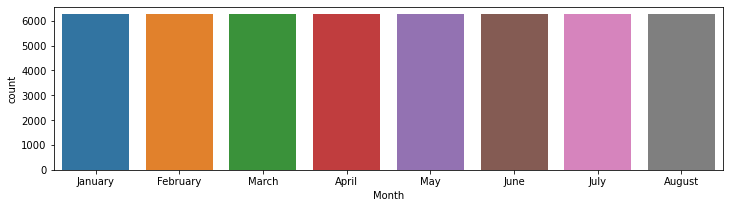

In [9]:
plt.figure(figsize=(12,3))
sns.countplot(data=df,x="Month")

## Age

In [10]:
df["Age"].value_counts()

31      1462
26      1460
36      1432
28      1431
32      1426
        ... 
4404       1
4414       1
2509       1
7456       1
7459       1
Name: Age, Length: 970, dtype: int64

In [11]:
df["Age"].unique()

array(['23', '-500', '28_', '28', '34', '54', '55', '21', '31', '33',
       '34_', '7580', '30', '30_', '24', '24_', '44', '45', '40', '41',
       '32', '33_', '35', '35_', '36', '39', '37', '181', '20', '46',
       '26', '42', '19', '31_', '48', '995', '40_', '37_', '38', '54_',
       '5079', '43', '21_', '22', '6409', '16', '7080', '18', '849',
       '3885', '20_', '15', '27', '43_', '38_', '25', '3052', '14',
       '5342', '17', '18_', '4431', '2657', '2111_', '46_', '47', '1032',
       '16_', '19_', '47_', '456', '5717', '53_', '53', '56', '25_',
       '27_', '55_', '3169', '1191', '29', '42_', '7140', '48_', '49',
       '49_', '8233', '6955', '2534', '3115', '7657', '51', '50', '5112',
       '50_', '32_', '6452', '2744', '22_', '17_', '1439', '29_', '5795',
       '4872', '1772', '15_', '1383', '5657', '52', '1934', '51_', '8352',
       '3734', '26_', '2056', '39_', '7508', '2339', '14_', '8406',
       '1424', '36_', '6953', '5626', '4471', '548', '44_', '769', '5490',

In [12]:
df["Age"].nunique()

970

In [14]:
def applyinAge(col):
    if "-" in col:
        return col.split("-")[1]
    elif "_" in col:
        return col.split("_")[0]
    else:
        return col
        

In [15]:
df["Age"]=df["Age"].apply(applyinAge)

In [16]:
df["Age"]

0         23
1         23
2        500
3         23
4         23
        ... 
49995     17
49996     17
49997     18
49998     18
49999     18
Name: Age, Length: 50000, dtype: object

In [17]:
df["Age"].value_counts()

26      1541
31      1528
36      1512
28      1508
32      1490
        ... 
4404       1
4414       1
2509       1
7456       1
7459       1
Name: Age, Length: 925, dtype: int64

In [18]:
df["Age"]=df["Age"].astype('int')

In [19]:
df["Age"].dtype

dtype('int32')

## Occupation

In [20]:
df["Occupation"].value_counts()

_______          3494
Scientist        3253
Architect        3250
Lawyer           3249
Teacher          3188
Mechanic         3182
Writer           3140
Engineer         3101
Entrepreneur     3095
Developer        3072
Journalist       3057
Media_Manager    3050
Doctor           3047
Manager          2982
Musician         2965
Accountant       2875
Name: Occupation, dtype: int64

In [21]:
df["Occupation"].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [22]:
df[df["Occupation"]=='_______']

ID Customer_ID    Month                 Name  Age          SSN  \
8       0x160e  CUS_0x21b1  January      Rick Rothackerj   28  004-07-5839   
16      0x161a  CUS_0x2dbc  January               Langep   34  486-85-3974   
18      0x161c  CUS_0x2dbc    March               Langep   34  486-85-3974   
20      0x161e  CUS_0x2dbc      May               Langep   34  486-85-3974   
29      0x162b  CUS_0xb891     June               Jasond   55    #F%$D@*&8   
...        ...         ...      ...                  ...  ...          ...   
49933  0x13a93  CUS_0x3a50     June            Jennifera   36  961-89-2245   
49959  0x13ab9  CUS_0x1fc1   August                  NaN   46  517-59-6831   
49965  0x13ac3  CUS_0xa936     June                Taroj   20  217-12-4152   
49967  0x13ac5  CUS_0xa936   August                Taroj   20  217-12-4152   
49997  0x13af3  CUS_0x419d     June  Christiaan Hetznerj   18  544-04-6202   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
8        _______      34847.84            3037.986667                  2  ...   
16       _______     143162.64           12187.220000                  1  ...   
18       _______     143162.64                    NaN                  1  ...   
20       _______     143162.64           12187.220000                  1  ...   
29       _______      30689.89            2612.490833                  2  ...   
...          ...           ...                    ...                ...  ...   
49933    _______       8308.13                    NaN                 10  ...   
49959    _______      31501.87                    NaN                  5  ...   
49965    _______     131488.44           11031.370000                  7  ...   
49967    _______     131488.44           11031.370000                  7  ...   
49997    _______      35662.88            2696.906667                  8  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
8            Good            605.03                24.464031   
16           Good           1303.01                28.616735   
18           Good           1303.01                26.519815   
20           Good           1303.01                31.376150   
29              _            632.46                27.445422   
...           ...               ...                      ...   
49933    Standard           2683.29                36.437226   
49959    Standard            333.02                38.013315   
49965        Good           1024.09                25.949968   
49967        Good           1024.09                42.693782   
49997    Standard           2391.98                40.984140   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
8       26 Years and 7 Months                     No           18.816215   
16      17 Years and 9 Months                     No          246.992319   
18     17 Years and 11 Months                     No          246.992319   
20      18 Years and 1 Months                     No          246.992319   
29      17 Years and 8 Months                     No           16.415452   
...                       ...                    ...                 ...   
49933   16 Years and 1 Months                    Yes           27.600324   
49959   30 Years and 3 Months                     NM           37.426158   
49965   28 Years and 2 Months                     No          203.091725   
49967   28 Years and 4 Months                     No          203.091725   
49997   19 Years and 0 Months                    Yes           60.787744   

      Amount_invested_monthly                 Payment_Behaviour  \
8            104.291825168246    Low_spent_Small_value_payments   
16           168.413702679309                            !@9#%8   
18                  __10000__   High_spent_Small_value_payments   
20          430.9475278803298    Low_spent_Large_value_payments   
29          84.95284817115969   High_spent_Small_value_payments   
...               

In [23]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)

Text(0, 0.5, 'cout')

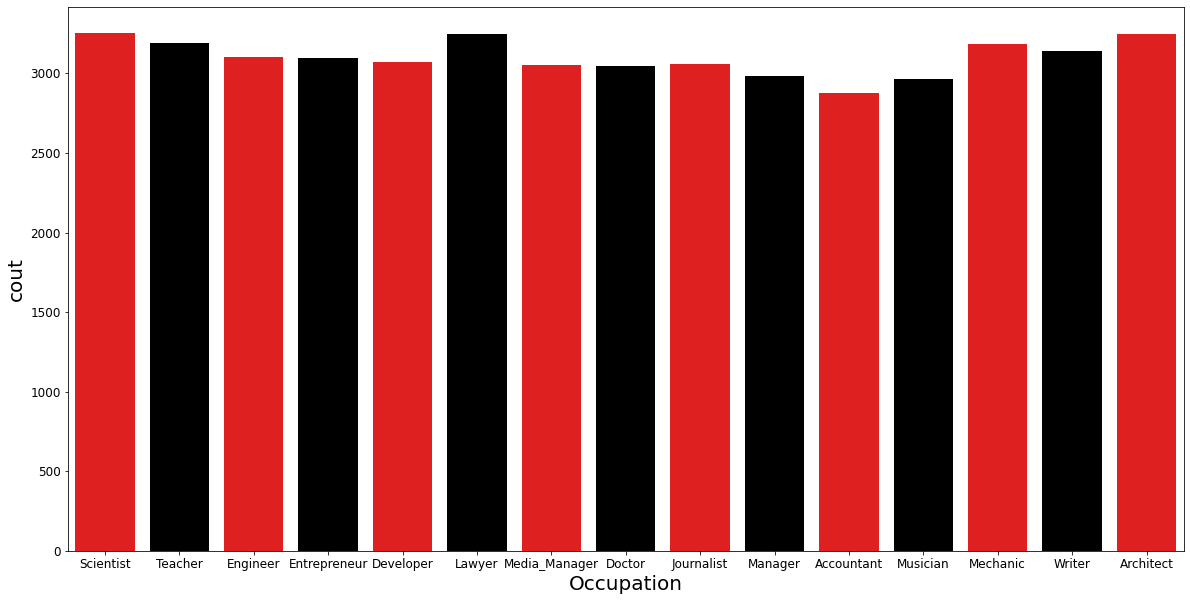

In [24]:
plt.figure(figsize=(20,10))

gfg=sns.countplot(data=df,x="Occupation",palette=["red","black"])

gfg.tick_params(labelsize=12)

gfg.set_xlabel("Occupation",fontsize=20)

gfg.set_ylabel("cout",fontsize=20)

## Annual_Income

In [25]:
df["Annual_Income"].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '45675.0', '35662.88',
       '35662.88_'], dtype=object)

In [26]:
def applyinAnnual_incom(col):
    if "_" in col:
        return col.split("_")[0]
    else:
        return col

In [27]:
df["Annual_Income"]=df["Annual_Income"].apply(applyinAnnual_incom)

In [28]:
df["Annual_Income"]

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
49994    35662.88
49995    35662.88
49996    35662.88
49998    35662.88
49999    35662.88
Name: Annual_Income, Length: 46506, dtype: object

In [29]:
df["Annual_Income"]=df["Annual_Income"].astype("float")

In [30]:
df["Annual_Income"].dtype

dtype('float64')

## Num_of_Loan

In [31]:
df["Num_of_Loan"].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '1017', '146', '563', '341', '444', '720', '49',
       '737', '1106', '466', '728', '313', '843', '597_', '617', '119',
       '663', '640', '92_', '1019', '501', '1302', '39', '716', '848',
       '931', '1214', '186', '424', '1001', '1110', '1152', '457', '1433',
       '1187', '52', '1480', '1047', '1035', '1347_', '193', '699', '329',
       '1451', '484', '132', '649', '995', '545', '684', '1135', '1094',
       '654', '58', '348', '614', '1363', '323', '1406', '1348', '430',
       '153', '1461', '905', '1312', '1424', '95', '1353', '1228', '819',
       '1006', '795', '359', '1209', '590', '696', '1185_', '1465', '911',
       '1181', '70', '816', '1369', '143', '1416', '455', '55', '1096',
       '1474', '420', '1131', '904', '89', '1259', '527', '1241', '449',
       '418', '23', '238', '638', '138', '235_', '2

In [32]:
df["Num_of_Loan"]=df["Num_of_Loan"].apply(applyinAnnual_incom)

In [33]:
df["Num_of_Loan"]=df["Num_of_Loan"].astype("int")

## Type_of_Loan

In [34]:
df["Type_of_Loan"]

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
49994    Auto Loan, Credit-Builder Loan, Home Equity Lo...
49995    Auto Loan, Credit-Builder Loan, Home Equity Lo...
49996    Auto Loan, Credit-Builder Loan, Home Equity Lo...
49998    Auto Loan, Credit-Builder Loan, Home Equity Lo...
49999    Auto Loan, Credit-Builder Loan, Home Equity Lo...
Name: Type_of_Loan, Length: 46506, dtype: object

## Num_of_Delayed_Payment

In [35]:
df["Num_of_Delayed_Payment"]

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
49994     13
49995     14
49996     16
49998     15
49999     13
Name: Num_of_Delayed_Payment, Length: 46506, dtype: object

In [36]:
def applyingNum_of_Delayed_Payment(col):
    #if "-" in col:
        #return col.split("-")[1]
    if "_" in str(col):
        return str(col).split("_")[0]
    else:
        return str(col)

In [37]:
applyingNum_of_Delayed_Payment('-2_')

'-2'

In [38]:
df["Num_of_Delayed_Payment"].unique()


array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '8', '20', '22',
       '13', '13_', '14_', '16', '12_', '18', '19', '23', '21', '24',
       '3318', '3083', '22_', '1338', '4_', '3104', '21_', '25', '10_',
       '183_', '9_', '1106', '834', '19_', '26', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '1_', '16_', '-2', '3478',
       '2420', '15_', '707', '708', '26_', '18_', '3815', '11_', '28',
       '27', '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882',
       '1941', '2628', '132', '3069', '306', '0_', '6_', '3539', '3684',
       '1823', '4128', '1946', '827', '2297', '2566', '904', '182', '929',
       '3568', '2503', '1552', '2812', '1697', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '2569_', '211', '793', '3484', '411', '3491', '2072',
   

In [39]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].apply(applyingNum_of_Delayed_Payment)

In [40]:
df["Num_of_Delayed_Payment"].unique()

array(['7', 'nan', '4', '8', '6', '1', '-1', '3', '0', '5', '9', '12',
       '15', '17', '10', '2', '11', '14', '20', '22', '13', '16', '18',
       '19', '23', '21', '24', '3318', '3083', '1338', '3104', '25',
       '183', '1106', '834', '26', '2672', '2008', '-3', '538', '-2',
       '3478', '2420', '707', '708', '3815', '28', '27', '1867', '2250',
       '1463', '4126', '2882', '1941', '2628', '132', '3069', '306',
       '3539', '3684', '1823', '4128', '1946', '827', '2297', '2566',
       '904', '182', '929', '3568', '2503', '1552', '2812', '1697', '851',
       '3905', '923', '88', '1668', '3253', '808', '2689', '3858', '642',
       '3457', '1402', '1732', '3154', '847', '3037', '2204', '3103',
       '1063', '2056', '1282', '2569', '211', '793', '3484', '411',
       '3491', '2072', '3050', '1049', '2162', '3402', '1718', '1014',
       '3260', '3855', '84', '2311', '3251', '1832', '4069', '3010',
       '733', '4241', '166', '2461', '1749', '3200', '663', '2185',
       '416

In [41]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype("float")

## Changed_Credit_Limit

In [42]:
df["Changed_Credit_Limit"]

0        11.27
1        11.27
2            _
3         6.27
4        11.27
         ...  
49994    18.19
49995    18.19
49996    15.19
49998    18.19
49999    18.19
Name: Changed_Credit_Limit, Length: 46506, dtype: object

In [44]:
df[df["Changed_Credit_Limit"]=="_"]

ID Customer_ID     Month           Name  Age          SSN  \
2       0x1604   CUS_0xd40     March  Aaron Maashoh  500  821-00-0265   
65      0x1663  CUS_0x4157  February   Charlie Zhur   23  070-19-1622   
66      0x1664  CUS_0x4157     March   Charlie Zhur   23  070-19-1622   
109     0x16a3  CUS_0x6c66      June            NaN   39  328-33-6328   
110     0x16a4  CUS_0x6c66      July            NaN   39  328-33-6328   
...        ...         ...       ...            ...  ...          ...   
49723  0x13959  CUS_0xb57b     April     Joseph Axp   47  891-87-0301   
49780  0x139ae  CUS_0x2f38       May          Tonya   19  520-31-3047   
49794  0x139c4  CUS_0x6793     March      Jonathann   32  201-71-4544   
49813  0x139df  CUS_0x9382      June        Morrisf   15  005-16-5195   
49814  0x139e0  CUS_0x9382      July        Morrisf   15  005-16-5195   

       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
2       Scientist      19114.120                    NaN                  3   
65         Doctor     114838.410            9843.867500                  2   
66         Doctor     114838.410                    NaN                  2   
109       Manager       8701.545             519.128750                  6   
110       Manager       8701.545                    NaN                  6   
...           ...            ...                    ...                ...   
49723  Accountant      22407.570            1677.297500                  8   
49780     Teacher     125854.120           10583.843333                  6   
49794     Manager      94609.020            7861.085000                  7   
49813      Writer       9857.680            1041.473333                  8   
49814      Writer       9857.680            1041.473333                  8   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
2      ...        Good            809.98                 28.609352   
65     ...        Good           1377.74                 27.626325   
66     ...        Good           1377.74                 35.141567   
109    ...    Standard           2602.69                 28.570031   
110    ...    Standard           2602.69                 38.465415   
...    ...         ...               ...                       ...   
49723  ...    Standard            359.41                 38.047871   
49780  ...           _           1278.59                 32.039273   
49794  ...    Standard            707.52                 41.888913   
49813  ...         Bad           3017.34                 38.242856   
49814  ...         Bad           3017.34                 38.457390   

          Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
2      22 Years and 3 Months                     No            49.574949   
65     21 Years and 5 Months                     NM           226.892792   
66     21 Years and 6 Months                     NM           226.892792   
109     9 Years and 4 Months                    Yes            36.548197   
110                      NaN                    Yes            36.548197   
...                      ...                    ...                  ...   
49723  30 Years and 5 Months                     No             9.406580   
49780  22 Years and 9 Months                    Yes           171.772758   
49794  29 Years and 1 Months                    Yes            52.857996   
49813   8 Years and 4 Months                    Yes            34.063935   
49814                    NaN                    Yes            34.063935   

      Amount_invested_monthly                Payment_Behaviour  \
2             81.699521264648  Low_spent_Medium_value_payments   
65         212.23560220847847  High_spent_Large_value_payments   
66          470.3857956796373  High_spent_Small_value_payments   
109        52.931613407134115  Low_spent_Medium_value_payments   
110        30.471806299271933  Low_spent_Medium_value_payments   
...                       ...                   

In [45]:

df.drop(df[df["Changed_Credit_Limit"]=="_"].index,inplace=True)

In [46]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])

In [47]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype("float")

## Credit_Mix

In [48]:
df[df["Credit_Mix"]=='_']

ID Customer_ID     Month             Name  Age          SSN  \
0       0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
10      0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
19      0x161d  CUS_0x2dbc     April           Langep   34  486-85-3974   
35      0x1635  CUS_0x1cdb     April           Deepaa   21  615-06-7821   
36      0x1636  CUS_0x1cdb       May           Deepaa   21  615-06-7821   
...        ...         ...       ...              ...  ...          ...   
49957  0x13ab7  CUS_0x1fc1      June        Deightonp   46  517-59-6831   
49966  0x13ac4  CUS_0xa936      July            Taroj   20  217-12-4152   
49975  0x13ad1  CUS_0xb888    August      Frank Jackb   37  922-43-4216   
49985  0x13ae3  CUS_0x12ec  February           Guptax   41  836-23-7353   
49989  0x13ae7  CUS_0x12ec      June           Guptax   42  836-23-7353   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist      19114.120            1824.843333                  3   
10       Teacher      34847.840            3037.986667                  2   
19      Engineer     143162.640           12187.220000                  1   
35     Developer      35547.710            2853.309167                  7   
36     Developer      35547.710            2853.309167                  7   
...          ...            ...                    ...                ...   
49957     Doctor      31501.870            2482.155833                  5   
49966     Writer     131488.440           11031.370000                  7   
49975   Engineer      10189.235             557.102917                  7   
49985  Scientist      45675.000            3635.250000                  8   
49989  Scientist      45675.000            3635.250000                  8   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
10     ...           _            605.03                 33.224951   
19     ...           _           1303.01                 39.501648   
35     ...           _            943.86                 28.924954   
36     ...           _            943.86                 41.776187   
...    ...         ...               ...                       ...   
49957  ...           _            333.02                 26.316863   
49966  ...           _           1024.09                 31.928199   
49975  ...           _           1381.87                 38.051921   
49985  ...           _            1771.8                 30.995374   
49989  ...           _            1771.8                 36.040716   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
10      26 Years and 9 Months                     No            18.816215   
19                        NaN                     No           246.992319   
35     30 Years and 11 Months                    Yes             0.000000   
36      31 Years and 0 Months                    Yes             0.000000   
...                       ...                    ...                  ...   
49957   30 Years and 1 Months                    Yes         16699.000000   
49966   28 Years and 3 Months                     No           203.091725   
49975                     NaN                    Yes            33.103979   
49985                     NaN                     NM           134.270256   
49989    6 Years and 3 Months                    Yes           134.270256   

       Amount_invested_monthly                 Payment_Behaviour  \
0            80.41529543900253   High_spent_Small_value_payments   
10           58.51597569589465   High_spent_Large_value_payments   
19           825.2162699393922   Low_spent_Medium_value_payments   
35           96.78548508587444  High_spent_Medium_value_payments   
36           62.72327834435009   High_spent_Small_value_payments   
...         

<Axes: xlabel='Credit_Mix', ylabel='count'>

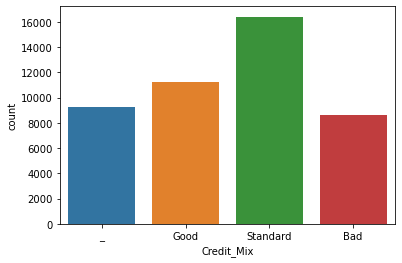

In [49]:
sns.countplot(data=df,x="Credit_Mix")

In [50]:
df["Credit_Mix"]=df["Credit_Mix"].apply(lambda x:x.replace('_',"Standard"))

In [51]:
df["Credit_Mix"].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

<Axes: xlabel='Credit_Mix', ylabel='count'>

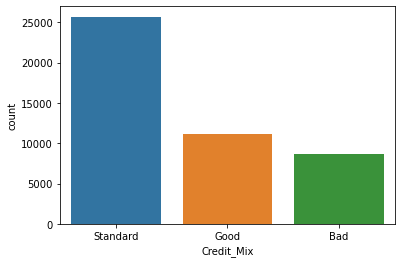

In [52]:
sns.countplot(data=df,x="Credit_Mix")

## Outstanding_Debt

In [54]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].apply(lambda x:x.split("_")[0])

In [55]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype("float")

## Credit_History_Age

In [56]:
df["Credit_History_Age"]

0         22 Years and 1 Months
1                           NaN
3         22 Years and 4 Months
4         22 Years and 5 Months
5         22 Years and 6 Months
                  ...          
49994     18 Years and 9 Months
49995    18 Years and 10 Months
49996    18 Years and 11 Months
49998     19 Years and 1 Months
49999     19 Years and 2 Months
Name: Credit_History_Age, Length: 45547, dtype: object

## Payment_of_Min_Amount

In [57]:
df["Payment_of_Min_Amount"].value_counts()

Yes    23905
No     16177
NM      5465
Name: Payment_of_Min_Amount, dtype: int64

<Axes: xlabel='Payment_of_Min_Amount', ylabel='count'>

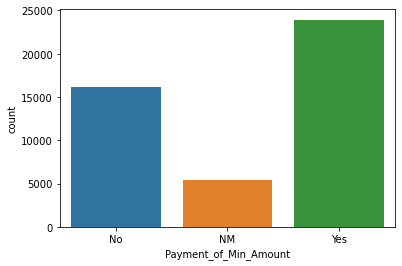

In [58]:
sns.countplot(data=df,x="Payment_of_Min_Amount")

## Amount_invested_monthly

In [59]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

In [60]:
Amount_invested_monthly('__10000__')

'10000'

In [61]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].apply(Amount_invested_monthly)

In [62]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype("float")

## Payment_Behaviour

In [64]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      11703
High_spent_Medium_value_payments     8010
Low_spent_Medium_value_payments      6346
High_spent_Large_value_payments      6105
High_spent_Small_value_payments      5242
Low_spent_Large_value_payments       4681
!@9#%8                               3460
Name: Payment_Behaviour, dtype: int64

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

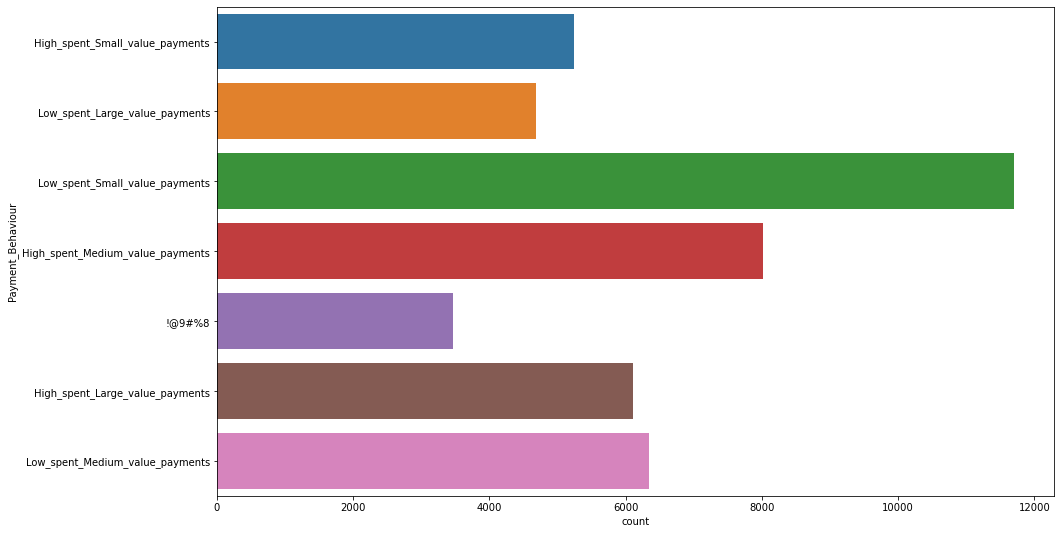

In [65]:
fig = plt.figure(figsize= (15,9))
sns.countplot(data=df,y="Payment_Behaviour")

## Monthly_Balance

In [67]:
df[df["Monthly_Balance"]=='__-333333333333333333333333333__']

ID Customer_ID     Month         Name  Age          SSN Occupation  \
5545   0x367f  CUS_0x9885  February    Paul Dayl   17  186-49-9679  Developer   
26177  0xaf63  CUS_0x5a90  February    Scuffhamq   45  264-53-1943   Engineer   
29158  0xc0d8  CUS_0x288d      July       Selamk   55  970-19-8342     Lawyer   
38622  0xf84c  CUS_0x2b77      July  Longstretho   21  006-36-0111     Doctor   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
5545        41086.40            3660.866667                  3  ...   
26177       29728.31            2551.359167                  3  ...   
29158       30748.93            2572.410833                  1  ...   
38622       15167.62            1471.968333                  4  ...   

       Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
5545     Standard            113.98                 34.826541   
26177        Good            917.00                 38.198076   
29158        Good            860.97                 40.634250   
38622        Good            847.03                 28.541848   

          Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
5545   11 Years and 6 Months                    Yes           145.544320   
26177  31 Years and 9 Months                     No            34.496445   
29158  19 Years and 5 Months                     No            43.727774   
38622                    NaN                     NM             9.930809   

       Amount_invested_monthly                Payment_Behaviour  \
5545                201.142993  Low_spent_Medium_value_payments   
26177               198.611513   Low_spent_Large_value_payments   
29158                79.071807  High_spent_Small_value_payments   
38622               128.875872   Low_spent_Small_value_payments   

                        Monthly_Balance  Credit_Score  
5545   __-333333333333333333333333333__      Standard  
26177  __-333333333333333333333333333__          Good  
29158  __-333333333333333333333333333__      Standard  
38622  __-333333333333333333333333333__      Standard  

[4 rows x 28 columns]

In [68]:
df.drop(df[df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)

In [69]:
df["Monthly_Balance"]=df["Monthly_Balance"].astype("float")

## Univariate analysis for numerical feature

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45543 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45543 non-null  object 
 1   Customer_ID               45543 non-null  object 
 2   Month                     45543 non-null  object 
 3   Name                      41013 non-null  object 
 4   Age                       45543 non-null  int32  
 5   SSN                       45543 non-null  object 
 6   Occupation                45543 non-null  object 
 7   Annual_Income             45543 non-null  float64
 8   Monthly_Inhand_Salary     38711 non-null  float64
 9   Num_Bank_Accounts         45543 non-null  int64  
 10  Num_Credit_Card           45543 non-null  int64  
 11  Interest_Rate             45543 non-null  int64  
 12  Num_of_Loan               45543 non-null  int32  
 13  Type_of_Loan              40398 non-null  object 
 14  Delay_

In [71]:
df.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  45543.000000   4.554300e+04           38711.000000       45543.000000   
mean     116.418286   1.768985e+05            4210.248582          16.827218   
std      669.180366   1.431053e+06            3210.679441         117.071939   
min       14.000000   7.005930e+03             319.556250          -1.000000   
25%       25.000000   1.943560e+04            1629.578333           3.000000   
50%       33.000000   3.772058e+04            3080.555000           6.000000   
75%       42.000000   7.309576e+04            5991.680000           7.000000   
max     8682.000000   2.419806e+07           15136.696667        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     45543.000000   45543.000000  45543.000000         45543.000000   
mean         22.854401      72.252289      3.047428            21.166217   
std         130.720485     466.359212     61.511584            14.841880   
min           0.000000       1.000000   -100.000000            -5.000000   
25%           4.000000       8.000000      2.000000            10.000000   
50%           6.000000      13.000000      3.000000            18.000000   
75%           7.000000      20.000000      5.000000            28.000000   
max        1499.000000    5788.000000   1495.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            42385.000000          45543.000000          44667.000000   
mean                29.716291             10.419354             26.639891   
std                215.799125              6.693111            185.361261   
min                 -3.000000              0.000000              0.000000   
25%                  9.000000              5.230000              3.000000   
50%                 14.000000              9.360000              6.000000   
75%                 18.000000             14.830000              9.000000   
max               4384.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count      45543.000000              45543.000000         45543.000000   
mean        1424.922780                 32.310293          1423.935166   
std         1164.176106                  5.115130          8392.804255   
min            0.540000                 20.000000             0.000000   
25%          559.350000                 28.075080            31.005246   
50%         1151.700000                 32.341995            69.432414   
75%         1941.980000                 36.527099           164.081471   
max         4998.070000                 50.000000         82256.000000   

       Amount_invested_monthly  Monthly_Balance  
count             43531.000000     44956.000000  
mean                628.282576       402.002520  
std                2020.000250       213.314145  
min                   0.000000         0.088628  
25%                  74.852757       270.200291  
50%                 136.524444       336.286224  
75%                 267.089546       469.134239  
max               10000.000000      1602.040519

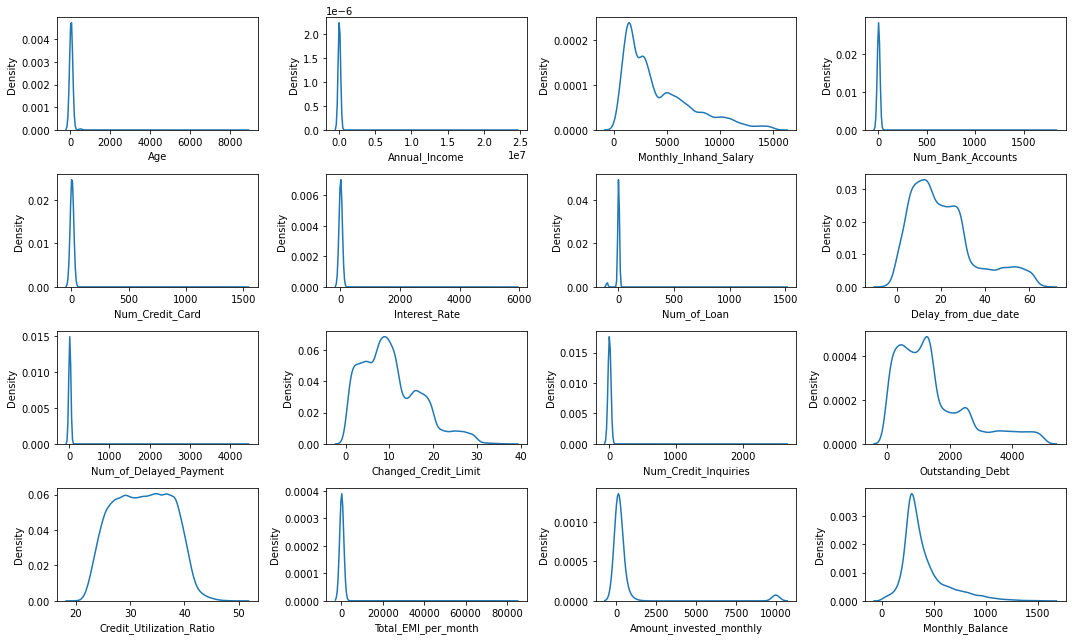

In [72]:
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(4,4,i+1)
    
    sns.kdeplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

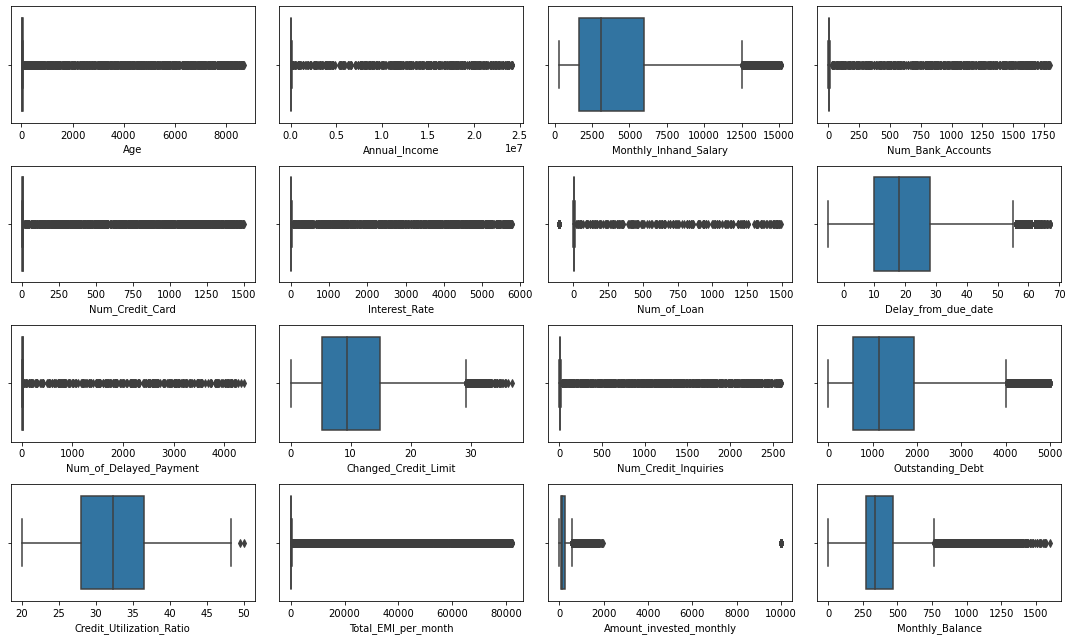

In [73]:
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(4,4,i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

## Check Missing Values

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45543 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45543 non-null  object 
 1   Customer_ID               45543 non-null  object 
 2   Month                     45543 non-null  object 
 3   Name                      41013 non-null  object 
 4   Age                       45543 non-null  int32  
 5   SSN                       45543 non-null  object 
 6   Occupation                45543 non-null  object 
 7   Annual_Income             45543 non-null  float64
 8   Monthly_Inhand_Salary     38711 non-null  float64
 9   Num_Bank_Accounts         45543 non-null  int64  
 10  Num_Credit_Card           45543 non-null  int64  
 11  Interest_Rate             45543 non-null  int64  
 12  Num_of_Loan               45543 non-null  int32  
 13  Type_of_Loan              40398 non-null  object 
 14  Delay_

In [75]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        4530
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       6832
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5145
Delay_from_due_date            0
Num_of_Delayed_Payment      3158
Changed_Credit_Limit           0
Num_Credit_Inquiries         876
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4134
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2012
Payment_Behaviour              0
Monthly_Balance              587
Credit_Score                   0
dtype: int64

In [76]:
df.isna().mean()*100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                         9.946644
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.001208
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.297016
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       6.934106
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         1.923457
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.077136
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.417803
Payment_Behaviour            0.000000
Monthly_Bala

<Axes: >

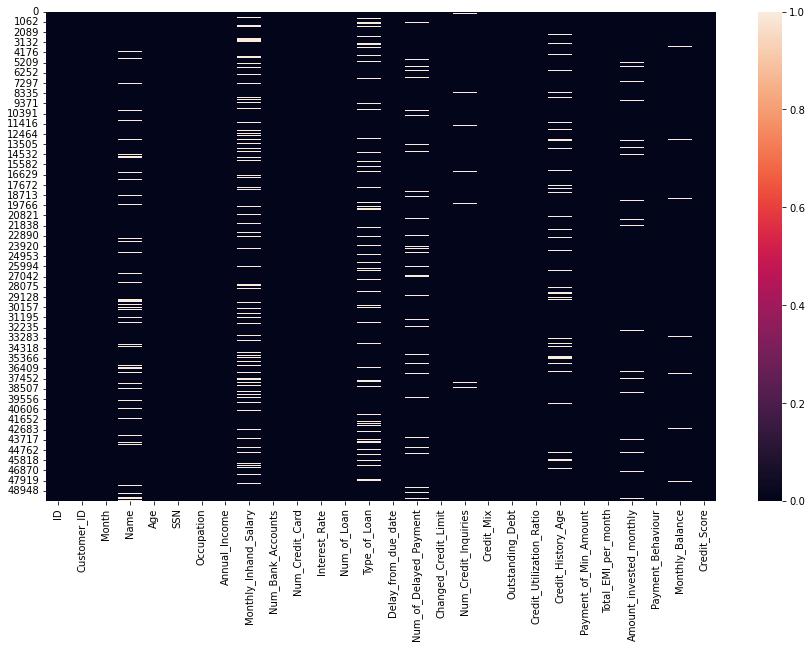

In [77]:
fig = plt.figure(figsize= (15,9))
sns.heatmap(df.isna())

## Detect outliers and split df to outliers and clean then analyze outliers df.

In [78]:
from datasist.structdata import detect_outliers

In [79]:
outliers_indices = detect_outliers(df, 0 ,list(df.select_dtypes(exclude="object").columns))
len(outliers_indices)

12378

In [80]:
df.drop(outliers_indices, inplace=True)


## Bivariate Categorical Analysis

<Axes: xlabel='Occupation', ylabel='count'>

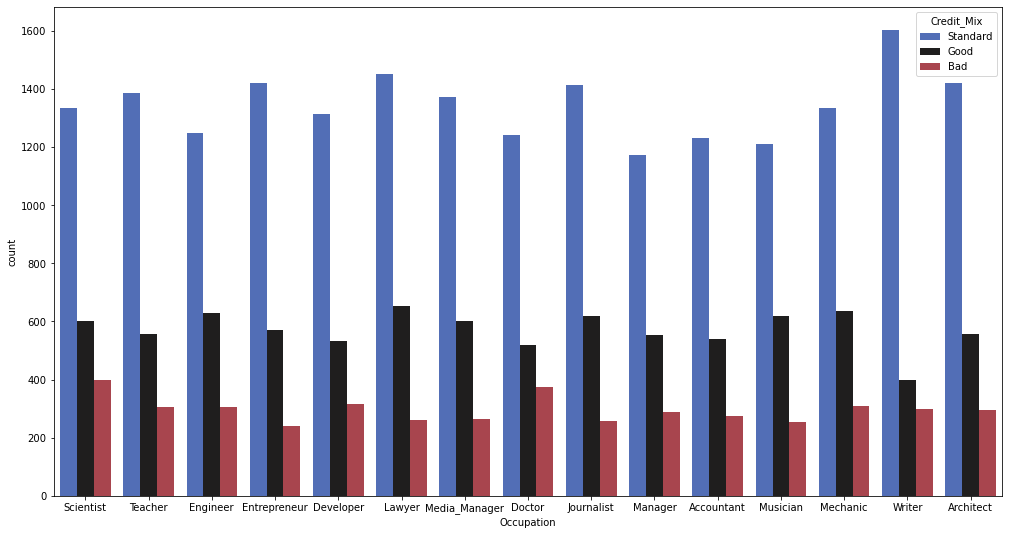

In [81]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Mix",palette="icefire")

<Axes: xlabel='Occupation', ylabel='count'>

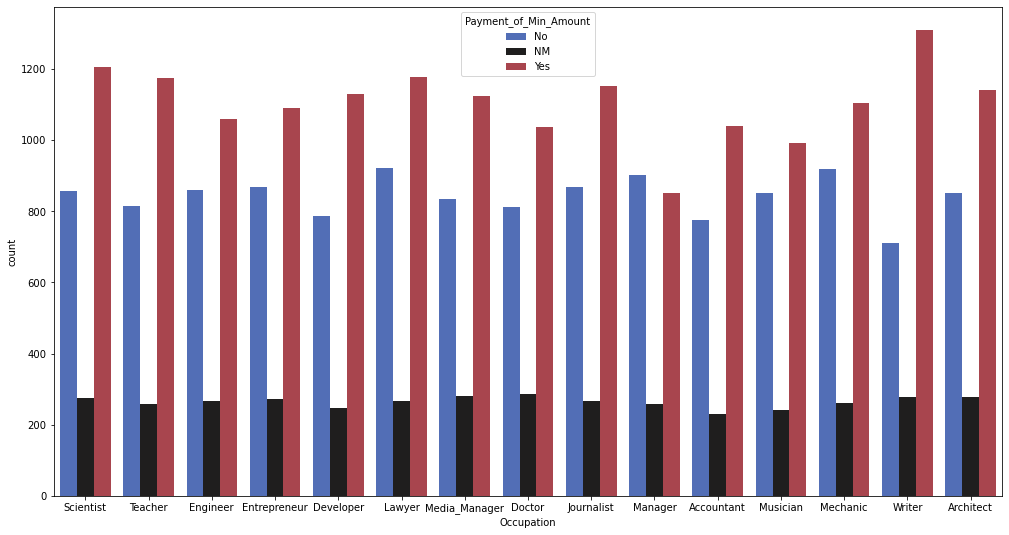

In [82]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_of_Min_Amount",palette="icefire")

<Axes: xlabel='Occupation', ylabel='count'>

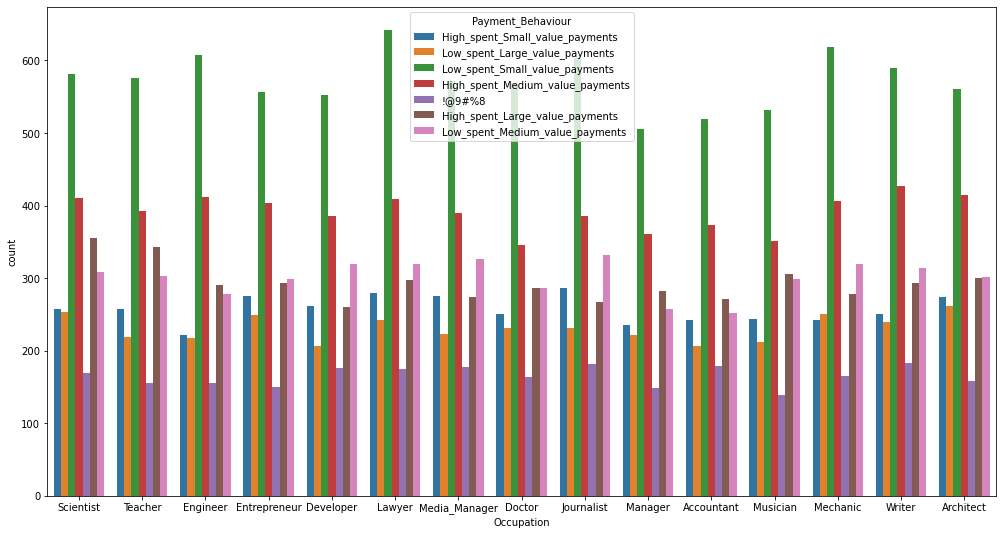

In [83]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

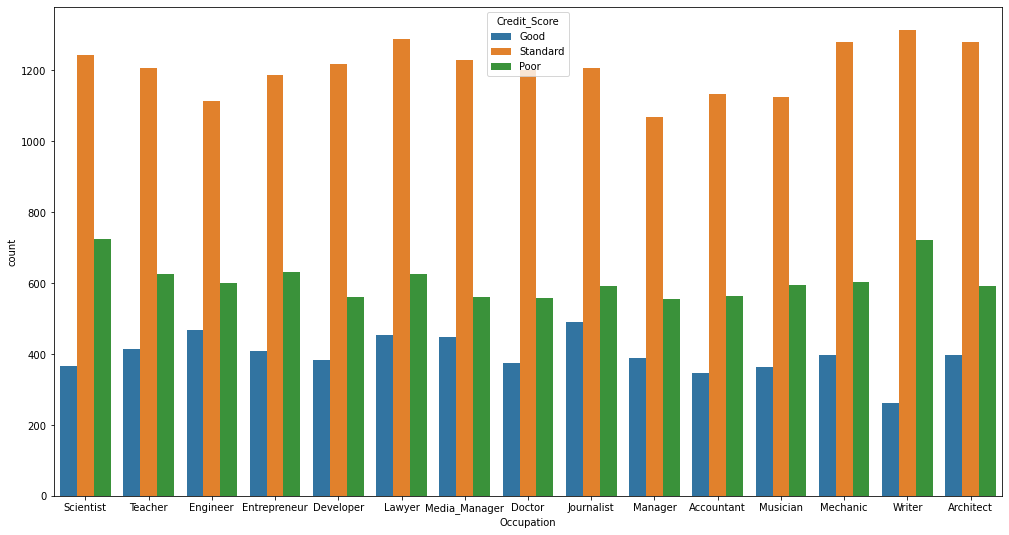

In [84]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Score")

## Bivariate Numerical Analysis

In [85]:
df.select_dtypes(exclude="object").columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

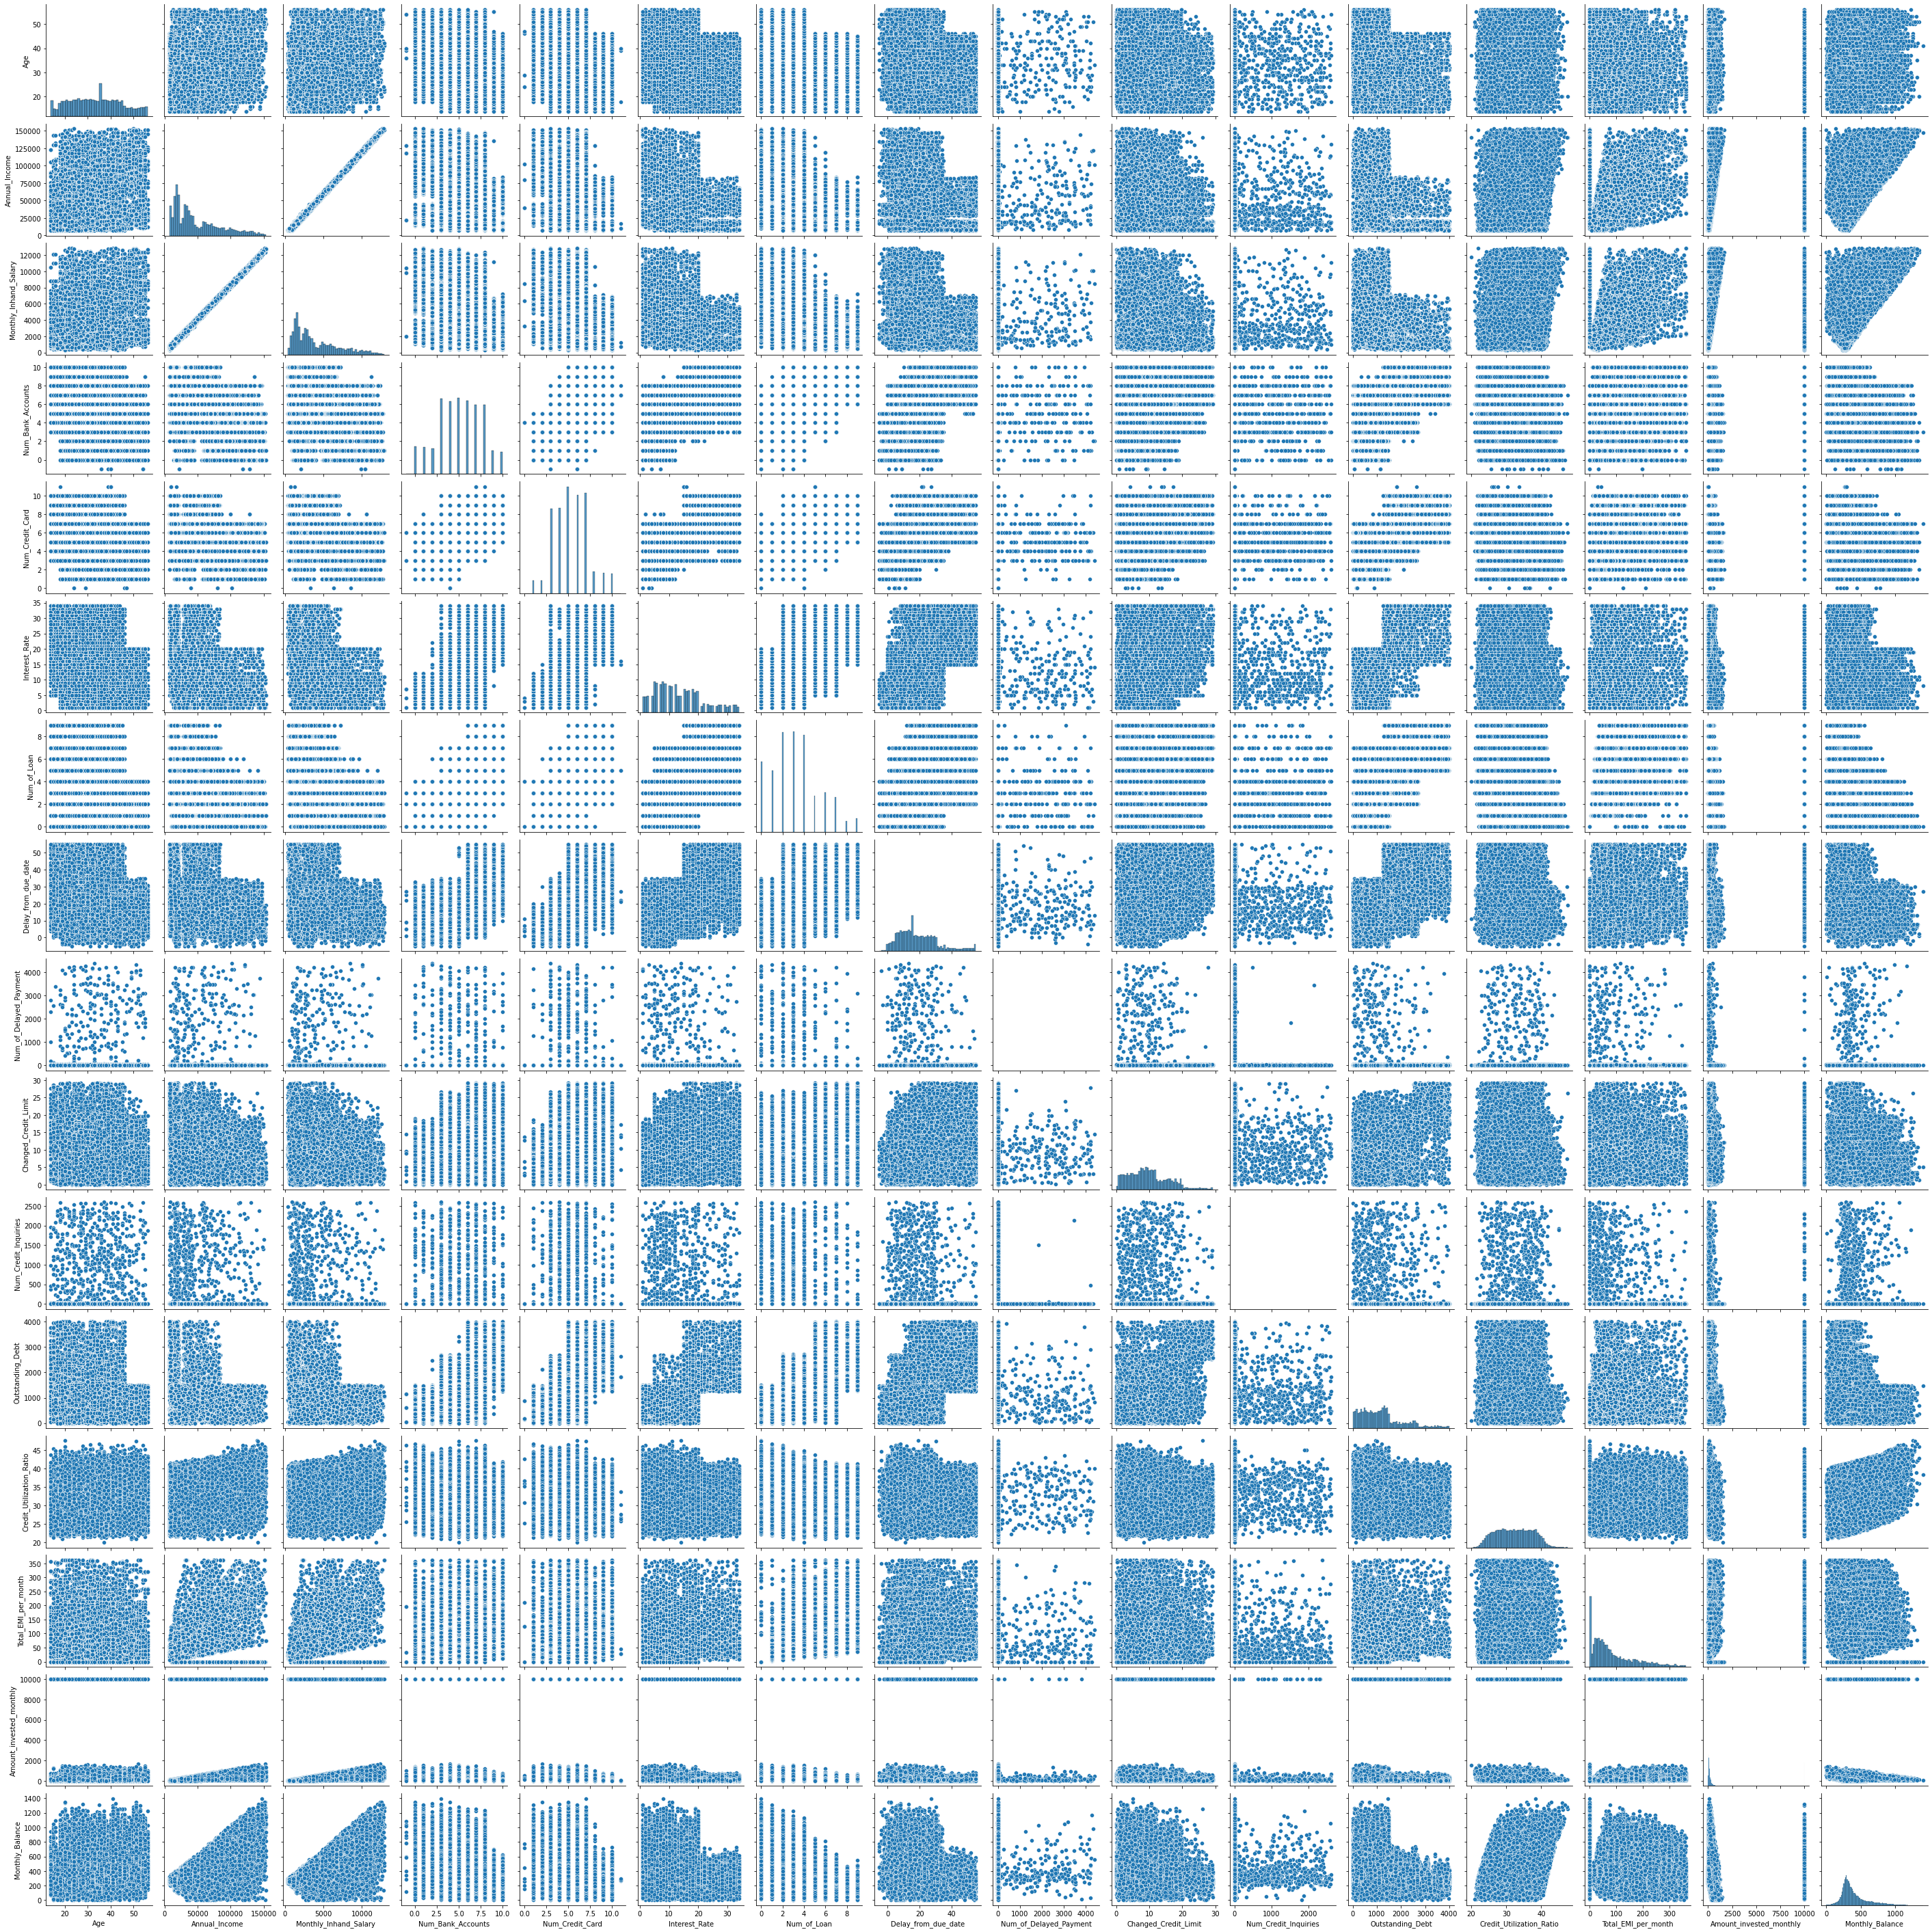

In [86]:
sns.pairplot(data=df)

In [87]:
df.corr()

Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.093504               0.091931   
Annual_Income             0.093504       1.000000               0.998269   
Monthly_Inhand_Salary     0.091931       0.998269               1.000000   
Num_Bank_Accounts        -0.168697      -0.224177              -0.224387   
Num_Credit_Card          -0.112494      -0.182088              -0.181219   
Interest_Rate            -0.208923      -0.269391              -0.268399   
Num_of_Loan              -0.190492      -0.254454              -0.249108   
Delay_from_due_date      -0.160178      -0.209581              -0.210125   
Num_of_Delayed_Payment    0.008856       0.008295               0.006422   
Changed_Credit_Limit     -0.135055      -0.152598              -0.149533   
Num_Credit_Inquiries     -0.007878      -0.012385              -0.011990   
Outstanding_Debt         -0.191552      -0.253781              -0.254767   
Credit_Utilization_Ratio  0.024779       0.162765               0.156631   
Total_EMI_per_month      -0.065551       0.495540               0.498894   
Amount_invested_monthly   0.006166       0.050942               0.052798   
Monthly_Balance           0.113252       0.704026               0.703931   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                               -0.168697        -0.112494      -0.208923   
Annual_Income                     -0.224177        -0.182088      -0.269391   
Monthly_Inhand_Salary             -0.224387        -0.181219      -0.268399   
Num_Bank_Accounts                  1.000000         0.391374       0.548729   
Num_Credit_Card                    0.391374         1.000000       0.447801   
Interest_Rate                      0.548729         0.447801       1.000000   
Num_of_Loan                        0.408131         0.343339       0.506592   
Delay_from_due_date                0.520948         0.424537       0.535316   
Num_of_Delayed_Payment             0.008583         0.003163       0.004411   
Changed_Credit_Limit               0.294694         0.199715       0.320168   
Num_Credit_Inquiries               0.006967         0.001818       0.014042   
Outstanding_Debt                   0.459775         0.447008       0.604999   
Credit_Utilization_Ratio          -0.051319        -0.036299      -0.066543   
Total_EMI_per_month                0.081199         0.076525       0.112062   
Amount_invested_monthly           -0.020040        -0.007212      -0.008191   
Monthly_Balance                   -0.225345        -0.183735      -0.278462   

                          Num_of_Loan  Delay_from_due_date  \
Age                         -0.190492            -0.160178   
Annual_Income               -0.254454            -0.209581   
Monthly_Inhand_Salary       -0.249108            -0.210125   
Num_Bank_Accounts            0.408131             0.520948   
Num_Credit_Card              0.343339             0.424537   
Interest_Rate                0.506592             0.535316   
Num_of_Loan                  1.000000             0.427087   
Delay_from_due_date          0.427087             1.000000   
Num_of_Delayed_Payment      -0.000256             0.009909   
Changed_Credit_Limit         0.297678             0.238174   
Num_Credit_Inquiries         0.007664             0.004538   
Outstanding_Debt             0.567914             0.509780   
Credit_Utilization_Ratio    -0.090446            -0.053015   
Total_EMI_per_month          0.481512             0.104026   
Amount_invested_monthly     -0.013978            -0.008627   
Monthly_Balance             -0.406579            -0.218230   

                          Num_of_Delayed_Payment  Changed_Credit_Limit  \
Age                                     0.008856             -0.135055   
Annual_Income                           0.008295             -0.152598   
Monthly_Inhand_Salary                   0.006422             -0.149533   
Num_Bank_Accounts                       0.0

<Axes: >

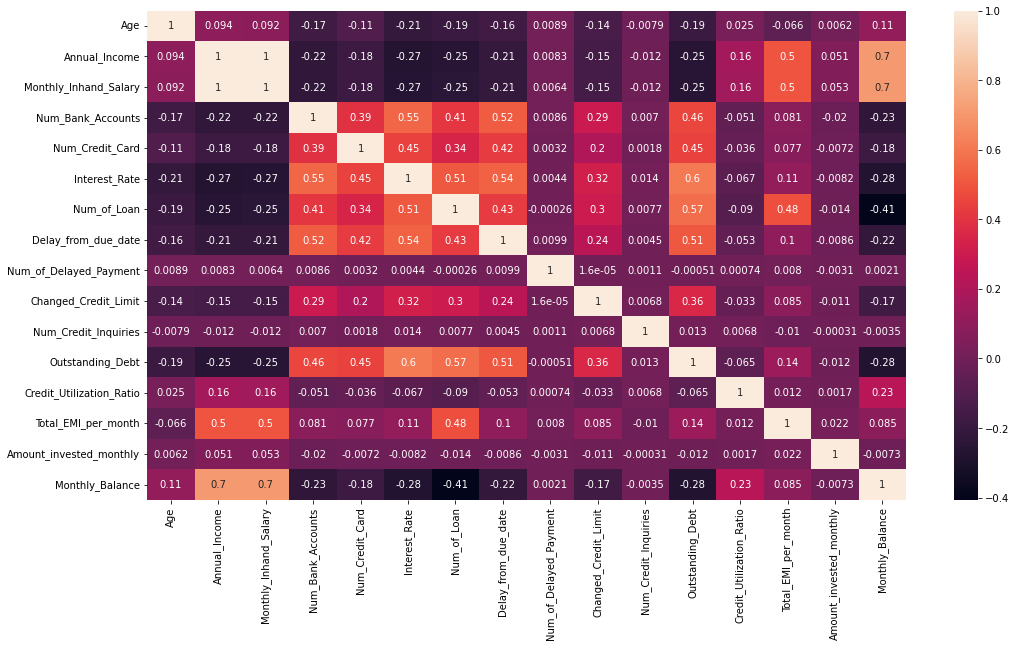

In [88]:
plt.figure(figsize= (17,9))
sns.heatmap(df.corr(),annot=True)

##  Bivariate Numerical With Categorical Analysis

In [89]:
df.select_dtypes(exclude="object").columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [90]:
df.select_dtypes(include="object").columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [91]:
df.groupby("Occupation").mean()

Age  Annual_Income  Monthly_Inhand_Salary  \
Occupation                                                       
Accountant     34.239843   48126.108563            4020.083414   
Architect      32.960793   49011.030361            4074.321279   
Developer      33.753818   47907.914609            3995.187835   
Doctor         33.528364   48804.510488            4023.627448   
Engineer       32.538919   48257.604771            4064.019424   
Entrepreneur   33.899865   48887.771612            4051.623816   
Journalist     35.619755   47444.514178            3953.641990   
Lawyer         33.903635   46087.052969            3872.298853   
Manager        32.792247   50136.336461            4228.273336   
Mechanic       33.382559   49776.505287            4122.750668   
Media_Manager  33.687221   47662.029330            3969.774095   
Musician       33.232837   51503.311169            4281.579965   
Scientist      33.498929   50380.525253            4153.608583   
Teacher        33.393589   49175.306563            4098.480811   
Writer         33.464084   47914.297240            3977.262749   

               Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Occupation                                                                      
Accountant              5.059716         5.392070      13.783651     3.190896   
Architect               5.146256         5.351101      13.243612     3.065198   
Developer               5.247108         5.413235      13.594632     3.356317   
Doctor                  5.214252         5.292546      13.582747     3.338022   
Engineer                4.983059         5.191392      13.468407     3.245879   
Entrepreneur            5.185451         5.356533      13.500674     3.283341   
Journalist              5.098339         5.390297      13.670017     3.102273   
Lawyer                  4.925190         5.323753      12.944210     3.230769   
Manager                 5.141650         5.195825      13.844433     3.161034   
Mechanic                5.064855         5.227870      13.577564     3.179667   
Media_Manager           4.915103         5.329759      12.987489     3.214030   
Musician                5.050888         5.333173      13.325492     3.135862   
Scientist               5.337473         5.504497      13.788437     3.378158   
Teacher                 5.103740         5.420748      14.010240     3.137133   
Writer                  5.514149         5.544623      14.443187     3.387897   

               Delay_from_due_date  Num_of_Delayed_Payment  \
Occupation                                                   
Accountant               18.312286               37.108421   
Architect                19.537885               20.349335   
Developer                18.893568               27.829365   
Doctor                   19.113455               28.159377   
Engineer                 18.070513               20.465881   
Entrepreneur             18.380332               29.875962   
Journalist               17.596591               26.797456   
Lawyer                   18.184700               26.167736   
Manager                  19.607356               35.194888   
Mechanic                 18.589833               28.504475   
Media_Manager            18.922699               31.471325   
Musician                 18.963034               35.176139   
Scientist                19.798287               30.118140   
Teacher                  19.444346               23.481164   
Writer                   20.099695               36.376410   

               Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
Occupation                                                                    
Accountant                 9.985702             28.513204       1174.752545   
Architect                  9.735018             27.005376       1126.368291   
Developer                 10.365909             27.237104       1220.348741   
Doctor                     9.518964             28.977371       1256.3

<Axes: ylabel='Occupation'>

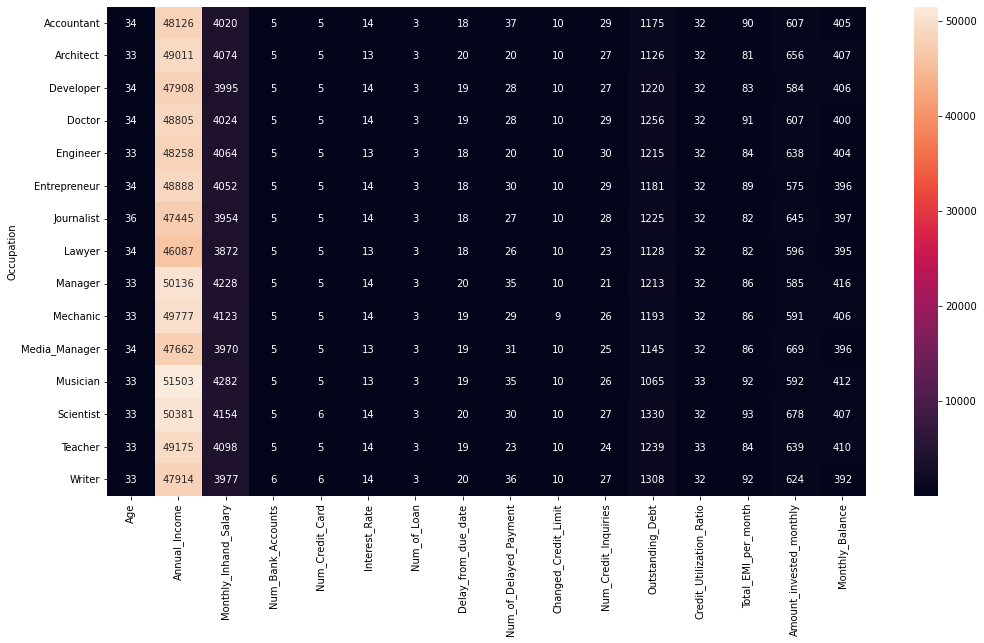

In [92]:
plt.figure(figsize= (17,9))
sns.heatmap(df.groupby("Occupation").mean(),annot=True,fmt='.0f')

In [93]:
df.groupby("Credit_Mix").median()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Credit_Mix                                                                  
Bad         30.0       20081.52            1770.481667                8.0   
Good        37.0       43450.25            3647.395000                3.0   
Standard    33.0       35038.35            2918.068333                6.0   

            Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
Credit_Mix                                                                     
Bad                     7.0           24.0          6.0                 35.0   
Good                    4.0            6.0          2.0                 10.0   
Standard                5.0           14.0          3.0                 18.0   

            Num_of_Delayed_Payment  Changed_Credit_Limit  \
Credit_Mix                                                 
Bad                           20.0                  9.39   
Good                           7.0                  5.94   
Standard                      14.0                 10.53   

            Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
Credit_Mix                                                                     
Bad                         10.0          2538.700                 31.483400   
Good                         3.0           713.330                 32.753051   
Standard                     5.0          1028.285                 32.273487   

            Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
Credit_Mix                                                                 
Bad                   81.551703               103.687839       276.560363  
Good                  51.655833               164.954490       405.911393  
Standard              57.523345               131.531842       339.857685

<Axes: ylabel='Credit_Mix'>

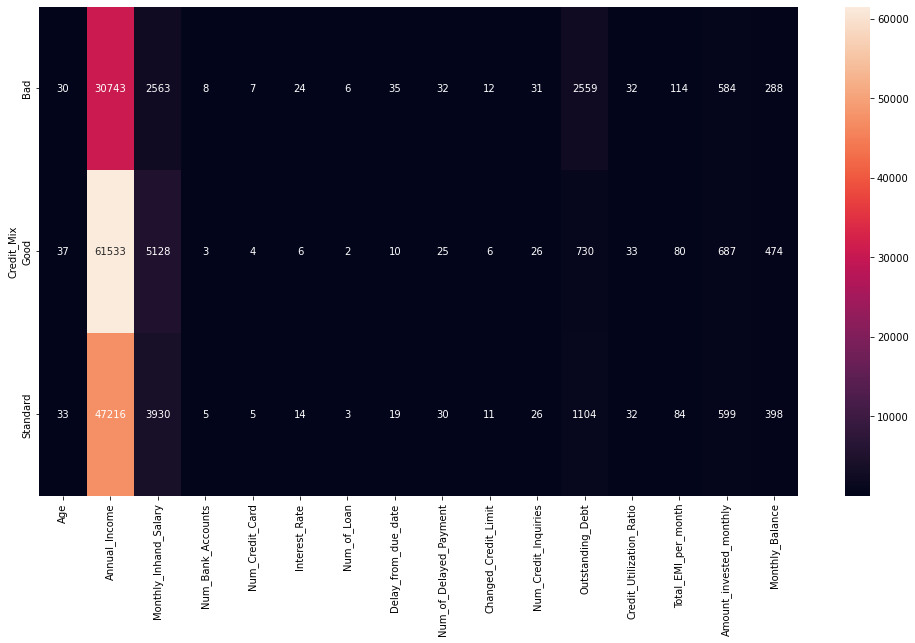

In [94]:
plt.figure(figsize= (17,9))
sns.heatmap(df.groupby("Credit_Mix").mean(),annot=True,fmt='.0f')

In [95]:
df.groupby("Payment_of_Min_Amount").median()

Age  Annual_Income  Monthly_Inhand_Salary  \
Payment_of_Min_Amount                                               
NM                     33.0       36412.86            2989.995417   
No                     36.0       43360.74            3651.703750   
Yes                    31.0       31113.36            2594.440000   

                       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Payment_of_Min_Amount                                                      
NM                                   5.0              5.0           12.0   
No                                   4.0              5.0            7.0   
Yes                                  6.0              6.0           17.0   

                       Num_of_Loan  Delay_from_due_date  \
Payment_of_Min_Amount                                     
NM                             3.0                 17.0   
No                             2.0                 11.0   
Yes                            4.0                 22.0   

                       Num_of_Delayed_Payment  Changed_Credit_Limit  \
Payment_of_Min_Amount                                                 
NM                                       13.0                  8.99   
No                                        9.0                  6.01   
Yes                                      16.0                 12.17   

                       Num_Credit_Inquiries  Outstanding_Debt  \
Payment_of_Min_Amount                                           
NM                                      5.0           1084.06   
No                                      3.0            715.18   
Yes                                     7.0           1425.04   

                       Credit_Utilization_Ratio  Total_EMI_per_month  \
Payment_of_Min_Amount                                                  
NM                                    32.481599            60.927303   
No                                    32.737583            50.851014   
Yes                                   31.954722            65.437347   

                       Amount_invested_monthly  Monthly_Balance  
Payment_of_Min_Amount                                            
NM                                  135.336550       343.046472  
No                                  162.343628       401.536499  
Yes                                 117.704393       309.817140

<Axes: ylabel='Payment_of_Min_Amount'>

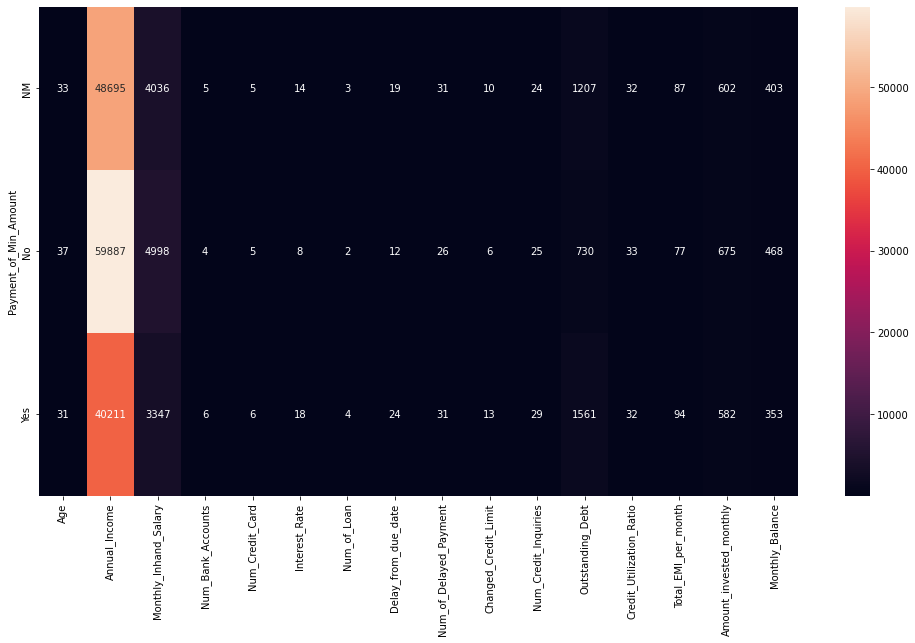

In [96]:
plt.figure(figsize= (17,9))
sns.heatmap(df.groupby("Payment_of_Min_Amount").mean(),annot=True,fmt='.0f')

In [97]:
df.groupby("Payment_Behaviour").mean()

Age  Annual_Income  \
Payment_Behaviour                                            
!@9#%8                            33.366828   48783.583345   
High_spent_Large_value_payments   34.388447   70190.196857   
High_spent_Medium_value_payments  33.815781   56019.174530   
High_spent_Small_value_payments   33.533074   47027.033380   
Low_spent_Large_value_payments    33.320635   44765.913017   
Low_spent_Medium_value_payments   33.849679   52327.203945   
Low_spent_Small_value_payments    33.130111   33154.280706   

                                  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Payment_Behaviour                                                            
!@9#%8                                      4099.791692           5.174334   
High_spent_Large_value_payments             5848.833921           4.793041   
High_spent_Medium_value_payments            4679.356540           5.001022   
High_spent_Small_value_payments             3905.045152           5.066667   
Low_spent_Large_value_payments              3734.093412           5.159307   
Low_spent_Medium_value_payments             4374.334124           5.130175   
Low_spent_Small_value_payments              2738.348056           5.407105   

                                  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Payment_Behaviour                                                               
!@9#%8                                   5.355125      13.686037     3.262712   
High_spent_Large_value_payments          5.142142      12.001592     2.887196   
High_spent_Medium_value_payments         5.298057      13.118950     3.089127   
High_spent_Small_value_payments          5.349416      13.538521     3.252659   
Low_spent_Large_value_payments           5.380952      13.522944     3.204329   
Low_spent_Medium_value_payments          5.298207      13.560106     3.190613   
Low_spent_Small_value_payments           5.516948      14.734071     3.504834   

                                  Delay_from_due_date  Num_of_Delayed_Payment  \
Payment_Behaviour                                                               
!@9#%8                                      19.232042               22.911675   
High_spent_Large_value_payments             17.216056               36.418372   
High_spent_Medium_value_payments            18.197853               28.627147   
High_spent_Small_value_payments             18.676524               24.673168   
Low_spent_Large_value_payments              18.800577               29.841364   
Low_spent_Medium_value_payments             18.667700               27.800618   
Low_spent_Small_value_payments              20.411415               29.559358   

                                  Changed_Credit_Limit  Num_Credit_Inquiries  \
Payment_Behaviour                                                              
!@9#%8                                        9.740775             30.275165   
High_spent_Large_value_payments               9.252227             27.377136   
High_spent_Medium_value_payments              9.766304             23.887018   
High_spent_Small_value_payments               9.813920             22.519185   
Low_spent_Large_value_payments                9.915267             23.751765   
Low_spent_Medium_value_payments               9.645858             26.444068   
Low_spent_Small_value_payments               10.277553             29.939502   

                                  Outstanding_Debt  Credit_Utilization_Ratio  \
Payment_Behaviour                                                              
!@9#%8                                 1219.941804                 32.322894   
High_spent_Large_value_payments        1047.152775                 33.587439   
High_spent_Medium_value_payments       1148.298500                 32.816857   
High_spent_Small_value_payments        1192.375300                 32.285860   
Low_spent_Large_value_payments         1185.751157                 31.852407   
Low_spent_Medium_value_payments      

<Axes: ylabel='Payment_Behaviour'>

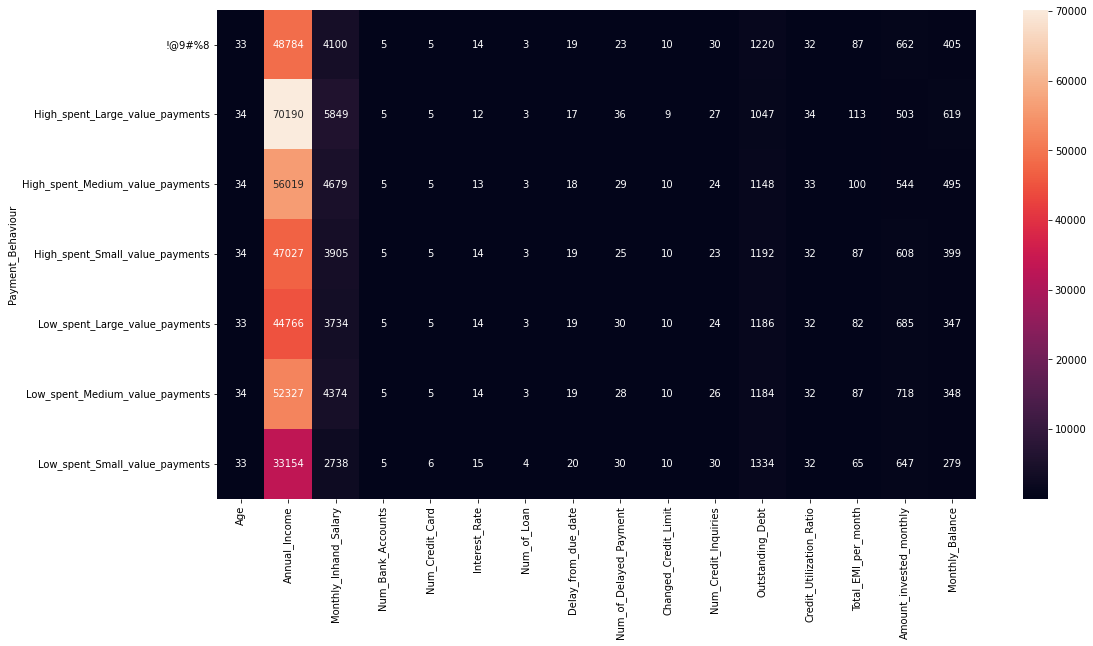

In [98]:
plt.figure(figsize= (17,9))
sns.heatmap(df.groupby("Payment_Behaviour").mean(),annot=True,fmt='.0f')

In [99]:
df.groupby('Credit_Score').mean()

Age  Annual_Income  Monthly_Inhand_Salary  \
Credit_Score                                                    
Good          36.484233   59153.982279            4914.055797   
Poor          31.508564   40155.120160            3348.992410   
Standard      33.703675   49583.765507            4133.016027   

              Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Credit_Score                                                                   
Good                   3.344683         4.127977       7.386112     2.154646   
Poor                   6.208498         6.403382      19.163922     4.336847   
Standard               5.181376         5.227853      12.814424     3.023156   

              Delay_from_due_date  Num_of_Delayed_Payment  \
Credit_Score                                                
Good                    10.626971               21.893605   
Poor                    25.976394               28.156017   
Standard                18.064990               31.824501   

              Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
Credit_Score                                                                 
Good                      6.871676             26.298189        765.731709   
Poor                     10.325153             29.948669       1781.552996   
Standard                 10.561488             24.956634       1054.209487   

              Credit_Utilization_Ratio  Total_EMI_per_month  \
Credit_Score                                                  
Good                         32.556869            81.826944   
Poor                         32.027001            95.480948   
Standard                     32.353418            83.891349   

              Amount_invested_monthly  Monthly_Balance  
Credit_Score                                            
Good                       697.778343       453.756856  
Poor                       589.296618       356.280834  
Standard                   609.377241       409.852895

<Axes: ylabel='Credit_Score'>

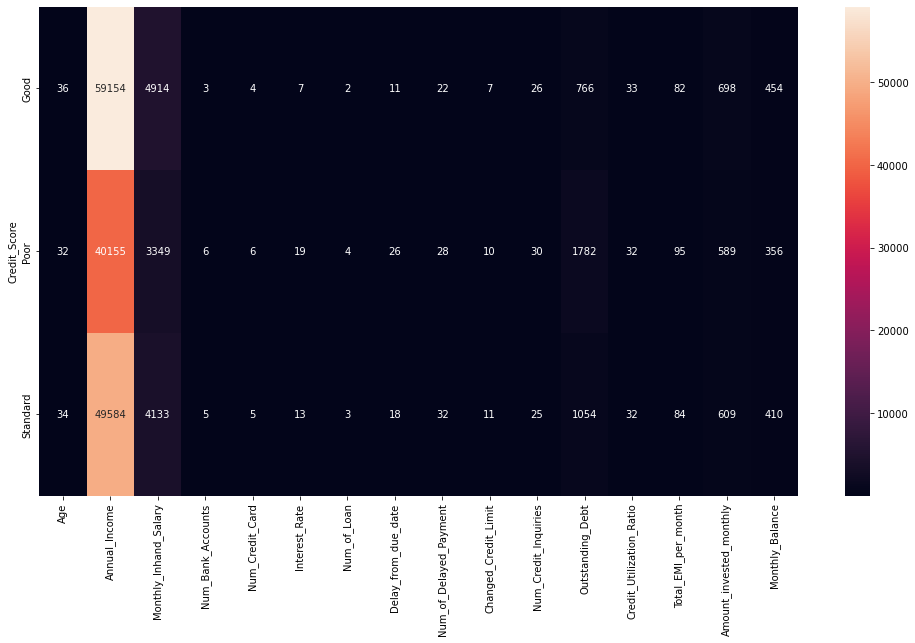

In [100]:
plt.figure(figsize= (17,9))
sns.heatmap(df.groupby('Credit_Score').mean(),annot=True,fmt='.0f')

## Classical Machine learning  Models

In [101]:
df2=df.copy()

###### drop ineffective columns

In [102]:
df2.drop(["ID","Customer_ID","Month","Name","SSN","Credit_History_Age","Type_of_Loan"],axis = 1,inplace = True)

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33165 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33165 non-null  int32  
 1   Occupation                33165 non-null  object 
 2   Annual_Income             33165 non-null  float64
 3   Monthly_Inhand_Salary     28199 non-null  float64
 4   Num_Bank_Accounts         33165 non-null  int64  
 5   Num_Credit_Card           33165 non-null  int64  
 6   Interest_Rate             33165 non-null  int64  
 7   Num_of_Loan               33165 non-null  int32  
 8   Delay_from_due_date       33165 non-null  int64  
 9   Num_of_Delayed_Payment    30835 non-null  float64
 10  Changed_Credit_Limit      33165 non-null  float64
 11  Num_Credit_Inquiries      32550 non-null  float64
 12  Credit_Mix                33165 non-null  object 
 13  Outstanding_Debt          33165 non-null  float64
 14  Credit

#### deal with missing values using knnimputer algorithm

In [104]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

In [105]:
df2[["Monthly_Inhand_Salary","Num_of_Delayed_Payment","Num_Credit_Inquiries","Amount_invested_monthly","Monthly_Balance"]]=imputer.fit_transform(df2[["Monthly_Inhand_Salary","Num_of_Delayed_Payment","Num_Credit_Inquiries","Amount_invested_monthly","Monthly_Balance"]])

In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33165 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       33165 non-null  int32  
 1   Occupation                33165 non-null  object 
 2   Annual_Income             33165 non-null  float64
 3   Monthly_Inhand_Salary     33165 non-null  float64
 4   Num_Bank_Accounts         33165 non-null  int64  
 5   Num_Credit_Card           33165 non-null  int64  
 6   Interest_Rate             33165 non-null  int64  
 7   Num_of_Loan               33165 non-null  int32  
 8   Delay_from_due_date       33165 non-null  int64  
 9   Num_of_Delayed_Payment    33165 non-null  float64
 10  Changed_Credit_Limit      33165 non-null  float64
 11  Num_Credit_Inquiries      33165 non-null  float64
 12  Credit_Mix                33165 non-null  object 
 13  Outstanding_Debt          33165 non-null  float64
 14  Credit

##### one hot encoding for categorical columns

In [107]:
df2 = pd.get_dummies(df2, columns=["Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour"], drop_first=True)

In [108]:
df2

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23       19114.12            1824.843333                  3   
1       23       19114.12            6120.283750                  3   
3       23       19114.12            4994.666250                  3   
4       23       19114.12            1824.843333                  3   
5       23       19114.12            3881.632583                  3   
...    ...            ...                    ...                ...   
49993   17       35662.88            2696.906667                  8   
49994   17       35662.88            2696.906667                  8   
49995   17       35662.88            2696.906667                  8   
49996   17       35662.88            2696.906667                  8   
49999   18       35662.88            1457.391500                  8   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                    3   
1                    4              3            4                   -1   
3                    4              3            4                    5   
4                    4              3            4                    6   
5                    4              3            4                    8   
...                ...            ...          ...                  ...   
49993                3             34            4                   19   
49994                3             34            4                   19   
49995                3             34            4                   19   
49996                3             34            4                   19   
49999                3             34            4                   19   

       Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Credit_Mix_Good  \
0                         7.0                 11.27  ...                0   
1                        14.2                 11.27  ...                1   
3                         4.0                  6.27  ...                1   
4                         7.8                 11.27  ...                1   
5                         4.0                  9.27  ...                1   
...                       ...                   ...  ...              ...   
49993                    14.0                 18.19  ...                0   
49994                    13.0                 18.19  ...                0   
49995                    14.0                 18.19  ...                0   
49996                    16.0                 15.19  ...                0   
49999                    13.0                 18.19  ...                0   

       Credit_Mix_Standard  Payment_of_Min_Amount_No  \
0                        1                         1   
1                        0                         1   
3                        0                         1   
4                        0                         1   
5                        0                         1   
...                    ...                       ...   
49993                    1                         0   
49994                    1                         0   
49995                    1                         0   
49996                    1                         0   
49999                    1                         0   

       Payment_of_Min_Amount_Yes  \
0                              0   
1                              0   
3                              0   
4                              0   
5                              0   
...                          ...   
49993                          1   
49994                          1   
49995                          1   
49996                          1   
49999                          1   

       Payment_Behaviour_High_spent_Large_value_payments  \
0                                                      0   
1                                                      0   
3                                         

#### split data

In [109]:
x=df2.drop(columns="Credit_Score")
y=df2["Credit_Score"]

#### cheak imbalanced classes

In [110]:
y.value_counts()* 100 / len(df2)

Standard    54.560531
Poor        27.462687
Good        17.976783
Name: Credit_Score, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42,stratify=y)

#### scaling for features

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(x_train)
X_test_ss = ss.transform(x_test)

##  LogisticRegression Model

In [114]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression().fit(X_train_ss,y_train)

In [115]:
from sklearn.metrics import classification_report
y_pre=lr.predict(X_test_ss)

In [116]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.54      0.55      0.54      1192
        Poor       0.69      0.50      0.58      1822
    Standard       0.69      0.78      0.73      3619

    accuracy                           0.66      6633
   macro avg       0.64      0.61      0.62      6633
weighted avg       0.66      0.66      0.66      6633



##  Naive_bayes Model

In [117]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [118]:
nb.fit(X_train_ss,y_train)
y_pre=nb.predict(X_test_ss)

In [119]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.43      0.83      0.57      1192
        Poor       0.66      0.64      0.65      1822
    Standard       0.82      0.59      0.68      3619

    accuracy                           0.64      6633
   macro avg       0.64      0.68      0.63      6633
weighted avg       0.70      0.64      0.65      6633



##  knn Model

In [120]:
from sklearn.neighbors import KNeighborsClassifier

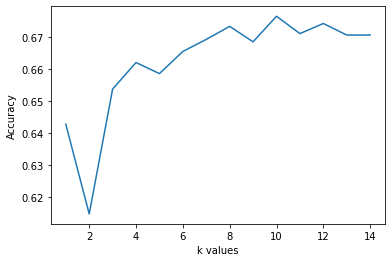

In [121]:
score_list = []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors =k)
    knn.fit(X_train_ss,y_train)
    score_list.append(knn.score(X_test_ss, y_test))

plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

## Svm Model

In [122]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

In [123]:
svm.fit(X_train_ss,y_train)
y_pre=svm.predict(X_test_ss)

In [124]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.47      0.69      0.56      1192
        Poor       0.70      0.54      0.61      1822
    Standard       0.74      0.72      0.73      3619

    accuracy                           0.66      6633
   macro avg       0.64      0.65      0.63      6633
weighted avg       0.68      0.66      0.67      6633



## DecisionTreeClassifier Model

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [126]:
dt.fit(X_train_ss,y_train)
y_pre=dt.predict(X_test_ss)

In [127]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.62      0.61      0.62      1192
        Poor       0.69      0.68      0.69      1822
    Standard       0.74      0.75      0.75      3619

    accuracy                           0.71      6633
   macro avg       0.69      0.68      0.68      6633
weighted avg       0.71      0.71      0.71      6633



##  Random Forest Model

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf=RandomForestClassifier()

In [130]:
rf.fit(X_train_ss,y_train)
y_pre=rf.predict(X_test_ss)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.73      0.71      0.72      1192
        Poor       0.80      0.77      0.79      1822
    Standard       0.80      0.83      0.82      3619

    accuracy                           0.79      6633
   macro avg       0.78      0.77      0.77      6633
weighted avg       0.79      0.79      0.79      6633



## AdaBoostClassifier

In [131]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [132]:
ada.fit(X_train_ss,y_train)
y_pre=ada.predict(X_test_ss)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.53      0.57      0.55      1192
        Poor       0.71      0.57      0.63      1822
    Standard       0.71      0.76      0.73      3619

    accuracy                           0.67      6633
   macro avg       0.65      0.63      0.64      6633
weighted avg       0.68      0.67      0.67      6633



## XGboost Model

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
xg=GradientBoostingClassifier()

In [134]:
xg.fit(X_train_ss,y_train)
y_pre=xg.predict(X_test_ss)
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

        Good       0.57      0.62      0.59      1192
        Poor       0.76      0.64      0.70      1822
    Standard       0.75      0.79      0.77      3619

    accuracy                           0.72      6633
   macro avg       0.70      0.68      0.69      6633
weighted avg       0.72      0.72      0.72      6633



## Final Pipeline 

In [135]:
df.drop(["ID","Customer_ID","Month","Name","SSN","Credit_History_Age","Type_of_Loan"],axis = 1,inplace = True)

In [136]:
x=df.drop(columns="Credit_Score")
y=df["Credit_Score"]

In [137]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42,stratify=y)

In [138]:
numeric_columns = x_train.select_dtypes(exclude='object').columns
numeric_columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
numeric_feature = Pipeline(steps=[('handlingmissing',SimpleImputer(strategy='median')),('scaling',StandardScaler(with_mean=False))])

In [140]:
cat_columns = x_train.select_dtypes(include='object').columns
cat_columns

Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')

In [141]:
from sklearn.preprocessing import OneHotEncoder
cat_feature = Pipeline(steps = [('missing',SimpleImputer(strategy='most_frequent')),('encoding',OneHotEncoder()),('scaling',StandardScaler(with_mean=False))])

In [142]:
from sklearn.compose import ColumnTransformer
processing = ColumnTransformer([('numeic',numeric_feature,numeric_columns),
                                ('cat', cat_feature, cat_columns)])

In [143]:
processing

ColumnTransformer(transformers=[('numeic',
                                 Pipeline(steps=[('handlingmissing',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'N..._Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
 

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
final_pipe= Pipeline(steps = [('processing',processing),('modeling',RandomForestClassifier())])

In [146]:
final_pipe.fit(x_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeic',
                                                  Pipeline(steps=[('handlingmissing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Paym...
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('missing',
                                                                 

In [147]:
from sklearn.metrics import classification_report
y_pred =final_pipe.predict(x_test)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.74      0.70      0.72      1192
        Poor       0.80      0.77      0.78      1822
    Standard       0.80      0.83      0.82      3619

    accuracy                           0.79      6633
   macro avg       0.78      0.77      0.77      6633
weighted avg       0.79      0.79      0.79      6633



## deployment

In [149]:
import joblib
save = joblib.dump(final_pipe,'creditScore.pkl')

In [150]:
%%writefile main.py
import numpy as np
import pandas as pd
import streamlit as st 
import joblib

classifier=joblib.load('creditScore.pkl')


def welcome():
    return "Welcome All"


def predict_CreditScore(Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance ):

    prediction=classifier.predict(pd.DataFrame({'Age':[Age],'Occupation':[Occupation],"Annual_Income":[Annual_Income],"Monthly_Inhand_Salary":[Monthly_Inhand_Salary],'Num_Bank_Accounts':[Num_Bank_Accounts],'Num_Credit_Card':[Num_Credit_Card],'Interest_Rate':[Interest_Rate],"Num_of_Loan":[Num_of_Loan],"Delay_from_due_date":[Delay_from_due_date],"Num_of_Delayed_Payment":[Num_of_Delayed_Payment],"Changed_Credit_Limit":[Changed_Credit_Limit],"Num_Credit_Inquiries":[Num_Credit_Inquiries],"Credit_Mix":[Credit_Mix],"Outstanding_Debt":[Outstanding_Debt],"Credit_Utilization_Ratio":[Credit_Utilization_Ratio],"Payment_of_Min_Amount":[Payment_of_Min_Amount],"Total_EMI_per_month":[Total_EMI_per_month],"Amount_invested_monthly":[Amount_invested_monthly],"Payment_Behaviour":[Payment_Behaviour],"Monthly_Balance":[Monthly_Balance]}))

    return prediction
  
      
def main():
    st.title("Credit Score Classification")
    html_temp = """
    <div style="background-color:tomato;padding:10px">
    <h2 style="color:white;text-align:center;">Streamlit Credit Score Classification ML App </h2>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)
    Age= st.text_input("Age","30")
    Occupation= st.text_input("Occupation","Developer")
    Annual_Income= st.text_input("Annual_Income","50000")
    Monthly_Inhand_Salary = st.text_input("Monthly_Inhand_Salary","5000")
    Num_Bank_Accounts= st.text_input("Num_Bank_Accounts","5")
    Num_Credit_Card= st.text_input("Num_Credit_Card","9")
    Interest_Rate= st.text_input("Interest_Rate","12")
    Num_of_Loan= st.text_input("Num_of_Loan","50")
    Delay_from_due_date = st.text_input("Delay_from_due_date","50")
    Num_of_Delayed_Payment= st.text_input("Num_of_Delayed_Payment","5")
    Changed_Credit_Limit = st.text_input("Changed_Credit_Limit","50")
    Num_Credit_Inquiries = st.text_input("Num_Credit_Inquiries","20")
    Credit_Mix = st.text_input("Credit_Mix","Good")
    Outstanding_Debt= st.text_input("Outstanding_Debt","809.98")
    Credit_Utilization_Ratio= st.text_input("Credit_Utilization_Ratio","31.944960")
    Payment_of_Min_Amount= st.text_input("Payment_of_Min_Amount","No")
    Total_EMI_per_month= st.text_input("Total_EMI_per_month","49.574949")
    Amount_invested_monthly= st.text_input("Amount_invested_monthly","80.41529543900253")
    Payment_Behaviour= st.text_input("Payment_Behaviour","High_spent_Small_value_payments")
    Monthly_Balance= st.text_input("Monthly_Balance","312.49408867943663")
    
    result=""
    if st.button("Predict"):
        result=predict_CreditScore(Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance)
    st.success('The output is {}'.format(result))
    if st.button("About"):
        st.text("Lets LEarn")
        st.text("Built with Streamlit")
if __name__=='__main__':
    main() 

Overwriting main.py
